In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 파일 읽기 및 전처리
csv_file_path = './input/train.csv'
df = pd.read_csv(csv_file_path)

# 'WT'를 0으로 변환
df.replace('WT', 0, inplace=True)

# ID와 SUBCLASS 컬럼을 제외하고 X로 처리
X = df.drop(columns=['ID', 'SUBCLASS'])

# SUBCLASS를 타겟 변수로 처리
y = df['SUBCLASS']
X

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57369/2700638673.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('WT', 0, inplace=True)


,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,R895R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T181S,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# 나머지 문자열 데이터를 수치형으로 변환
# 모든 문자열 컬럼을 LabelEncoder를 통해 변환 (범주형 데이터 인코딩)
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'int':  # 문자열 또는 숫자가 혼합된 경우에도 처리
        X[col] = X[col].astype(str)  # 먼저 모든 데이터를 문자열로 변환
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# SUBCLASS(target)도 LabelEncoder로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# X와 y는 전처리가 완료된 상태로 준비됨
print(f'X shape: {X.shape}')
print(f'y shape: {y_encoded.shape}')

X shape: (6201, 4384)
y shape: (6201,)


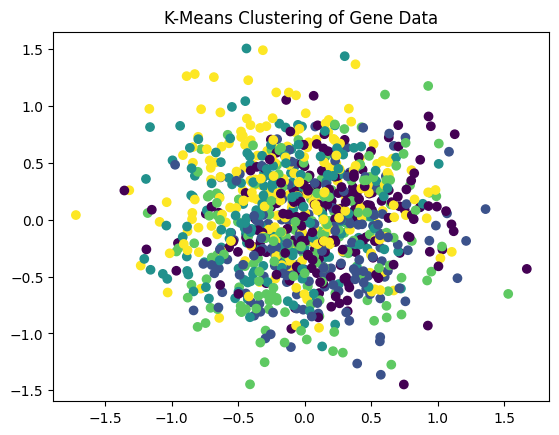

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np 

# 데이터 전처리
X = np.random.rand(1000, 500)  # 예시 데이터, 1000개의 샘플과 500개의 유전자 특성

# PCA로 차원 축소 (50개 차원으로 줄임)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 클러스터링 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Gene Data')
plt.show()



In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Train 데이터 읽기 및 전처리
train_file_path = './input/train.csv'
df_train = pd.read_csv(train_file_path)

# 'WT'를 0으로 변환
df_train.replace('WT', 0, inplace=True)

# ID와 SUBCLASS 컬럼을 제외하고 X_train으로 처리
X_train = df_train.drop(columns=['ID', 'SUBCLASS'])

# 모든 데이터를 문자열로 변환한 후 LabelEncoder 적용
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype == 'int':
        X_train[col] = X_train[col].astype(str)
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

# 데이터를 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 2. 클러스터링 수행 (KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)  # 5개의 클러스터로 예시
kmeans.fit(X_train_scaled)

# 3. 클러스터링 결과 확인
train_clusters = kmeans.predict(X_train_scaled)
df_train['Cluster'] = train_clusters
print(df_train[['ID', 'SUBCLASS', 'Cluster']].head())


/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/3343513083.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace('WT', 0, inplace=True)


           ID SUBCLASS  Cluster
0  TRAIN_0000    KIPAN        3
1  TRAIN_0001     SARC        3
2  TRAIN_0002     SKCM        3
3  TRAIN_0003     KIRC        3
4  TRAIN_0004   GBMLGG        3


/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/3343513083.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Cluster'] = train_clusters


In [8]:

# 4. Test 데이터 읽기 및 전처리
test_file_path = './input/test.csv'
df_test = pd.read_csv(test_file_path)

# 'WT'를 0으로 변환
df_test.replace('WT', 0, inplace=True)


# ID와 SUBCLASS를 제외한 X_test로 처리
X_test = df_test.drop(columns=['ID'])

# Train 데이터에서 사용된 LabelEncoder와 동일한 변환 적용, 새로운 값 처리
for col in X_test.columns:
    
    if col in label_encoders:
        X_test[col] = X_test[col].astype(str)
        le = label_encoders[col]
        print(col)
        # 새로운 값(훈련에서 보지 못한 값)은 -1로 설정
        X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/2948016629.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace('WT', 0, inplace=True)


A2M
AAAS
AADAT
AARS1
ABAT
ABCA1
ABCA2
ABCA3
ABCA4
ABCA5
ABCA6
ABCA8
ABCA9
ABCB1
ABCB11
ABCB4
ABCB6
ABCB7
ABCB8
ABCB9
ABCC1
ABCC2
ABCC3
ABCC4
ABCC5
ABCC8
ABCD1
ABCD2
ABCD3
ABCE1
ABCF2
ABCG2
ABCG4
ABCG8
ABHD2
ABHD4
ABHD6
ABI1
ABI3BP
ABL1
ABLIM1
ABR
ACAA1
ACAA2
ACACA
ACADL
ACADM
ACADS
ACADSB
ACADVL
ACAT1
ACAT2
ACE
ACHE
ACKR1
ACKR3
ACLY
ACO2
ACOT2
ACOT8
ACOX1
ACOX2
ACOX3
ACP1
ACP2
ACP5
ACRBP
ACRV1
ACSL1
ACSL3
ACSL4
ACSL5
ACSL6
ACSM1
ACSM3
ACSS1
ACSS2
ACTA1
ACTA2
ACTB
ACTC1
ACTG1
ACTG2
ACTL7B
ACTN1
ACTN2
ACTN3
ACTN4
ACTR2
ACTR3
ACVR1
ACVR1B
ACVR2A
ACVRL1
ADA
ADAD1
ADAM10
ADAM12
ADAM15
ADAM17
ADAM19
ADAM2
ADAM23
ADAM8
ADAM9
ADAMDEC1
ADAMTS1
ADAMTS5
ADAR
ADCY1
ADCY2
ADCY6
ADCY9
ADCYAP1
ADD1
ADD2
ADD3
ADGRA2
ADGRE1
ADGRG1
ADGRL2
ADGRL4
ADH1C
ADH4
ADH5
ADH7
ADIG
ADIPOQ
ADIPOR1
ADIPOR2
ADM
ADORA2B
ADRA1B
ADRA2B
ADRA2C
ADRM1
ADSL
AEBP1
AEN
AFAP1L2
AFF1
AFG3L2
AGER
AGFG1
AGGF1
AGL
AGO2
AGO4
AGPAT3
AGPAT4
AGR2
AGRN
AGXT
AHCY
AHNAK
AHR
AHSP
AIFM1
AIFM3
AIMP2
AK1
AK2
AK3
AK4
AKAP1
AKAP10
AKAP12
AKAP1

KeyboardInterrupt: 

In [ ]:

# Test 데이터도 동일하게 표준화
X_test_scaled = scaler.transform(X_test)

# 5. Test 데이터의 클러스터 예측
test_clusters = kmeans.predict(X_test_scaled)

# 결과를 데이터프레임에 추가
df_test['Predicted_Cluster'] = test_clusters
print(df_test[['ID', 'Predicted_Cluster']].head())


In [11]:
train_file_path = './input/train.csv'
test_file_path = './input/test.csv'

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# 'WT'를 0으로 변환 (Train과 Test 모두 적용)
df_train.replace('WT', 0, inplace=True)
df_test.replace('WT', 0, inplace=True)

# 2. Train 데이터와 Test 데이터 합치기
df_train['is_train'] = 1  # Train 데이터라는 표시
df_test['is_train'] = 0   # Test 데이터라는 표시
df_total = pd.concat([df_train, df_test], ignore_index=True)

# ID와 SUBCLASS를 제외한 X로 처리
X_total = df_total.drop(columns=['ID', 'SUBCLASS'])

# 3. 모든 데이터를 문자열로 변환한 후 LabelEncoder 적용
label_encoders = {}
for col in X_total.columns:
    if X_total[col].dtype == 'object' or X_total[col].dtype == 'int':
        X_total[col] = X_total[col].astype(str)
        le = LabelEncoder()
        X_total[col] = le.fit_transform(X_total[col])
        label_encoders[col] = le

# 데이터를 표준화
scaler = StandardScaler()
X_total_scaled = scaler.fit_transform(X_total)

# 4. Train과 Test 데이터 다시 분리
X_train_scaled = X_total_scaled[df_total['is_train'] == 1]
X_test_scaled = X_total_scaled[df_total['is_train'] == 0]

# 차원 축소에 필요한 정보
input_dim = X_train_scaled.shape[1]

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/2241512036.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace('WT', 0, inplace=True)
/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/2241512036.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace('WT', 0, inplace=True)
/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_57447/2241512036.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# 5. Autoencoder 모델 정의 및 학습

# Autoencoder 모델 정의
encoding_dim = 100  # 축소된 차원의 크기
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder 모델 컴파일
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Autoencoder 전체 데이터를 사용하여 학습
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True)

# 차원 축소된 데이터 획득 (encoder 부분만)
encoder_model = Model(inputs=input_layer, outputs=encoded)
X_train_reduced = encoder_model.predict(X_train_scaled)
print(f"차원 축소된 Train 데이터 크기: {X_train_reduced.shape}")

# Test 데이터에 차원 축소 적용 (Autoencoder의 Encoder 부분만 사용)
X_test_reduced = encoder_model.predict(X_test_scaled)
print(f"차원 축소된 Test 데이터 크기: {X_test_reduced.shape}")

# 6. 차원 축소된 결과 저장
df_train_reduced = pd.DataFrame(X_train_reduced, columns=[f'feature_{i}' for i in range(X_train_reduced.shape[1])])
df_train_reduced['ID'] = df_train['ID']
df_train_reduced.to_csv('train_with_reduced_dimensions.csv', index=False)

df_test_reduced = pd.DataFrame(X_test_reduced, columns=[f'feature_{i}' for i in range(X_test_reduced.shape[1])])
df_test_reduced['ID'] = df_test['ID']
df_test_reduced.to_csv('test_with_reduced_dimensions.csv', index=False)

print("Train 및 Test 데이터에 대한 차원 축소 완료 및 저장.")

2024-10-09 07:47:20.429937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9188
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7058
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6920
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6597
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7138
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6728
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6994
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7181
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6905
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6566
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6978
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7121
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6565
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7006
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6960
Epoc

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y_train = df_train['SUBCLASS']

# 5. SUBCLASS 예측 모델 학습 (RandomForest 예시)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)

# 6. Test 데이터의 SUBCLASS 예측
y_test_pred = rf.predict(X_test_reduced)

# 7. Test 데이터 결과 저장 (차원 축소된 결과와 SUBCLASS 예측 포함)
df_test_reduced = pd.DataFrame(X_test_reduced, columns=[f'feature_{i}' for i in range(X_test_reduced.shape[1])])
df_test_reduced['ID'] = df_test['ID']
df_test_reduced['Predicted_SUBCLASS'] = y_test_pred
df_test_reduced.to_csv('2test_with_predictions.csv', index=False)

print("Test 데이터의 차원 축소 및 SUBCLASS 예측 완료 및 저장.")

Test 데이터의 차원 축소 및 SUBCLASS 예측 완료 및 저장.


In [18]:
df_test_reduced[['ID','Predicted_SUBCLASS']].to_csv('2test_with_predictions.csv', index=False)


In [20]:
df_test_reduced[['Predicted_SUBCLASS']].value_counts()

Predicted_SUBCLASS
BRCA                  754
STES                  551
KIPAN                 308
BLCA                  270
GBMLGG                126
UCEC                   74
SKCM                   68
KIRC                   66
LAML                   61
HNSC                   57
LGG                    53
THCA                   45
LUSC                   32
COAD                   25
PRAD                   16
PCPG                   13
OV                      8
LIHC                    4
ACC                     4
LUAD                    4
CESC                    3
SARC                    2
DLBC                    1
PAAD                    1
Name: count, dtype: int64